## Construct a fully connected neural network model for classifying the CIFAR-10 dataset. Use a 70%-30% split for training and validation data.

 a) Visualize the data by plotting an image from each category from the
 CIFAR-10 dataset.

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

#Load data
cifar = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar.load_data()

#Add the given test and test sets together for full data
x = np.concatenate((x_train, x_test), axis=0)

y = np.concatenate((y_train, y_test), axis=0)

#Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=y)

In [10]:
print(x_test.shape)
print(x_train.shape)

print(y_test.shape)
print(y_train.shape)

(18000, 32, 32, 3)
(42000, 32, 32, 3)
(18000, 1)
(42000, 1)


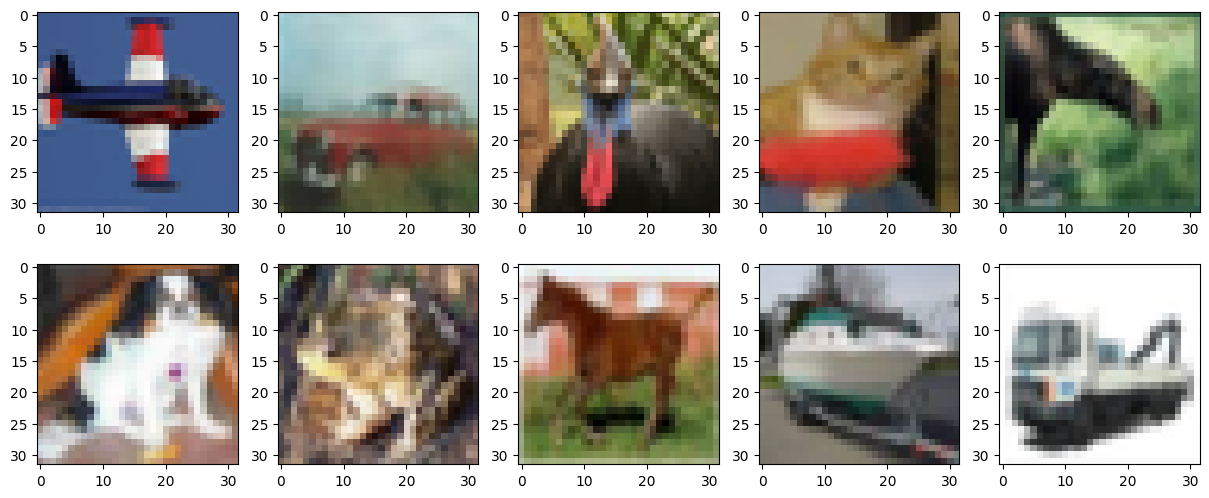

In [11]:
#There are 10 classes total

wanted_num = 0

plt.figure(figsize=(15,6))

for i in range(y_train.size):
  if y_train[i] != wanted_num:
    continue
  elif y_train[i] == wanted_num and wanted_num < 9:
    plt.subplot(2, 5, wanted_num+1)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    wanted_num += 1
    #print(Y_train[i])
  elif wanted_num == 9:
    plt.subplot(2, 5, 10)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    #print(Y_train[i])
    break
plt.show()

In [12]:
#Shape the data
#Normalize, rescale and reshape
x_train = x_train.reshape(42000, 3*32*32)
x_test = x_test.reshape(18000, 3*32*32)

#Normalize to [0,1]
x_train = x_train/255
x_test = x_test/255

#Flatten
y_train = y_train.flatten()
y_test = y_test.flatten()

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype(float)
x_test = x_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(42000, 3072)
(42000, 10)
(18000, 3072)
(18000, 10)


b) Demonstrate the tuning of the hyperparameters of the neural network
 via grid-search

In [13]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from keras import optimizers

layers = [2,3,4]
epo = [2,5,10]
neurons = [100,90,20]

def make_model(layer, neuron):
    model = Sequential().
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu', input_shape =(3*32*32,)))
    for i in range(layer):
      model.add(Dense(neuron, activation = 'relu'))
    model.add(Dense(10, activation = "softmax"))
    model.summary()
    model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

old_acc = 0.0

for neuron in neurons:
  for epoch in epo:
    for layer in layers:

      model = make_model(layer, neuron)

      pred = model.predict(x_test)
      loss, acc = model.evaluate(x_test, y_test)
      history = model.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test))

      if acc > old_acc:
        old_acc = acc
        best_layer = layer
        best_epoch = epoch
        best_neurons = neuron

print("The best parameters are: ", best_epoch, "epochs, ", (best_layer+1), "layers", best_neurons, "neurons.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_36 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_180 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_181 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_182 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_183 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0738 - loss: 2.3389
Epoch 1/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.2641 - loss: 2.0018 - val_accuracy: 0.3809 - val_loss: 1.7171
Epoch 2/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.3739 - loss: 1.7412 - val_accuracy: 0.3990 - val_loss: 1.6661


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_37 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_184 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_185 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_186 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_187 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_188 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1061 - loss: 2.3108
Epoch 1/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.2545 - loss: 2.0050 - val_accuracy: 0.3652 - val_loss: 1.7473
Epoch 2/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3684 - loss: 1.7443 - val_accuracy: 0.3837 - val_loss: 1.7085


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_38 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_189 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_190 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_191 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_192 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_193 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_194 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1001 - loss: 2.3078
Epoch 1/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.2460 - loss: 2.0218 - val_accuracy: 0.3444 - val_loss: 1.8256
Epoch 2/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.3639 - loss: 1.7499 - val_accuracy: 0.3877 - val_loss: 1.7141


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_39 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_195 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_196 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_197 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_198 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1022 - loss: 2.3348
Epoch 1/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2682 - loss: 1.9927 - val_accuracy: 0.3772 - val_loss: 1.7240
Epoch 2/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3826 - loss: 1.7156 - val_accuracy: 0.3871 - val_loss: 1.6950
Epoch 3/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4118 - loss: 1.6393 - val_accuracy: 0.4118 - val_loss: 1.6313
Epoch 4/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4260 - loss: 1.5975 - val_accuracy: 0.4308 - val_loss: 1.5765
Epoch 5/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4472 - loss: 1.5499 - val_accuracy: 0.4338 - val_loss: 1.5780
Epoch 6/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.4557 - loss: 1.5137 - val_accuracy: 0.4474 - val_loss: 1.5293
Epoch 7/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4611 - loss: 1.5018 - val_accuracy: 

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_40 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_199 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_200 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_201 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_202 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_203 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1044 - loss: 2.3484
Epoch 1/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2514 - loss: 2.0145 - val_accuracy: 0.3554 - val_loss: 1.7895
Epoch 2/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.3668 - loss: 1.7581 - val_accuracy: 0.3858 - val_loss: 1.6965
Epoch 3/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3861 - loss: 1.6836 - val_accuracy: 0.3956 - val_loss: 1.6637
Epoch 4/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4068 - loss: 1.6435 - val_accuracy: 0.4183 - val_loss: 1.6122
Epoch 5/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4232 - loss: 1.6027 - val_accuracy: 0.4194 - val_loss: 1.6186
Epoch 6/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4267 - loss: 1.5858 - val_accuracy: 0.4177 - val_loss: 1.6005
Epoch 7/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4420 - loss: 1.5502 - val_accuracy:

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_41 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_204 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_205 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_206 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_207 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_208 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_209 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0895 - loss: 2.3046
Epoch 1/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.2587 - loss: 2.0028 - val_accuracy: 0.3349 - val_loss: 1.8050
Epoch 2/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3640 - loss: 1.7602 - val_accuracy: 0.3825 - val_loss: 1.7067
Epoch 3/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3883 - loss: 1.6980 - val_accuracy: 0.3902 - val_loss: 1.6881
Epoch 4/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4163 - loss: 1.6334 - val_accuracy: 0.4171 - val_loss: 1.6363
Epoch 5/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4284 - loss: 1.5903 - val_accuracy: 0.4101 - val_loss: 1.6618
Epoch 6/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4500 - loss: 1.5407 - val_accuracy: 0.4198 - val_loss: 1.6151
Epoch 7/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4553 - loss: 1.5206 - val_acc

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_42 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_210 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_211 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_212 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_213 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1034 - loss: 2.3273
Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2620 - loss: 1.9986 - val_accuracy: 0.3578 - val_loss: 1.7750
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.3733 - loss: 1.7322 - val_accuracy: 0.4044 - val_loss: 1.6615
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4146 - loss: 1.6328 - val_accuracy: 0.4083 - val_loss: 1.6498
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.4303 - loss: 1.5868 - val_accuracy: 0.4205 - val_loss: 1.6097
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4415 - loss: 1.5512 - val_accuracy: 0.4394 - val_loss: 1.5708


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_43 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_214 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_215 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_216 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_217 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_218 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1057 - loss: 2.3202
Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2565 - loss: 2.0134 - val_accuracy: 0.3606 - val_loss: 1.7524
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3747 - loss: 1.7323 - val_accuracy: 0.3954 - val_loss: 1.6693
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4098 - loss: 1.6425 - val_accuracy: 0.4164 - val_loss: 1.6327
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4266 - loss: 1.5861 - val_accuracy: 0.4419 - val_loss: 1.5646
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4439 - loss: 1.5501 - val_accuracy: 0.4358 - val_loss: 1.5622


Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_44 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_219 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_220 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_221 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_222 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_223 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_224 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0990 - loss: 2.3144
Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2445 - loss: 2.0152 - val_accuracy: 0.3562 - val_loss: 1.7689
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3669 - loss: 1.7480 - val_accuracy: 0.4018 - val_loss: 1.6661
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.4006 - loss: 1.6608 - val_accuracy: 0.4119 - val_loss: 1.6212
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.4078 - loss: 1.6204 - val_accuracy: 0.3971 - val_loss: 1.6797
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4326 - loss: 1.5739 - val_accuracy: 0.4220 - val_loss: 1.6272


Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_45 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_225 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_226 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_227 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_228 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0796 - loss: 2.3396
Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.2675 - loss: 1.9856 - val_accuracy: 0.3727 - val_loss: 1.7457
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3708 - loss: 1.7468 - val_accuracy: 0.3738 - val_loss: 1.7300
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3988 - loss: 1.6569 - val_accuracy: 0.4214 - val_loss: 1.6167
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4196 - loss: 1.6027 - val_accuracy: 0.4216 - val_loss: 1.6015
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.4397 - loss: 1.5620 - val_accuracy: 0.4178 - val_loss: 1.6173
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4491 - loss: 1.5281 - val_accuracy: 0.4341 - val_loss: 1.5794
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4596 - loss: 1.5091 - val_a

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_46 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_229 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_230 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_231 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_232 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_233 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1096 - loss: 2.3213
Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2686 - loss: 1.9883 - val_accuracy: 0.3551 - val_loss: 1.7748
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3734 - loss: 1.7407 - val_accuracy: 0.3922 - val_loss: 1.6818
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4049 - loss: 1.6525 - val_accuracy: 0.4101 - val_loss: 1.6341
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4243 - loss: 1.6019 - val_accuracy: 0.4201 - val_loss: 1.6050
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.4382 - loss: 1.5740 - val_accuracy: 0.4386 - val_loss: 1.5779
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4455 - loss: 1.5435 - val_accuracy: 0.4355 - val_loss: 1.5815
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4588 - loss: 1.5059 - va

Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_47 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_234 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_235 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_236 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_237 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_238 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_239 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1020 - loss: 2.3161
Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2433 - loss: 2.0182 - val_accuracy: 0.3246 - val_loss: 1.8328
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.3638 - loss: 1.7617 - val_accuracy: 0.3842 - val_loss: 1.7020
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3971 - loss: 1.6670 - val_accuracy: 0.3996 - val_loss: 1.6516
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4196 - loss: 1.6093 - val_accuracy: 0.4171 - val_loss: 1.6094
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4310 - loss: 1.5816 - val_accuracy: 0.4356 - val_loss: 1.5660
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4449 - loss: 1.5374 - val_accuracy: 0.4157 - val_loss: 1.6392
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4530 - loss: 1.5209 - val_

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_48 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_240 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_241 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_242 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_243 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1064 - loss: 2.3667
Epoch 1/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2653 - loss: 2.0048 - val_accuracy: 0.3648 - val_loss: 1.7718
Epoch 2/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.3696 - loss: 1.7455 - val_accuracy: 0.3931 - val_loss: 1.6799


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_49 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_244 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_245 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_246 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_247 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_248 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1244 - loss: 2.3157
Epoch 1/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.2601 - loss: 2.0070 - val_accuracy: 0.3502 - val_loss: 1.7875
Epoch 2/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3707 - loss: 1.7450 - val_accuracy: 0.3647 - val_loss: 1.7398


Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_50 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_249 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_250 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_251 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_252 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_253 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_254 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1032 - loss: 2.3131
Epoch 1/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2501 - loss: 2.0200 - val_accuracy: 0.3263 - val_loss: 1.8248
Epoch 2/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3645 - loss: 1.7562 - val_accuracy: 0.3763 - val_loss: 1.7221


Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_51 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_255 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_256 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_257 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_258 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1072 - loss: 2.3560
Epoch 1/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2673 - loss: 2.0032 - val_accuracy: 0.3664 - val_loss: 1.7584
Epoch 2/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3838 - loss: 1.7184 - val_accuracy: 0.4111 - val_loss: 1.6357
Epoch 3/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4129 - loss: 1.6259 - val_accuracy: 0.4220 - val_loss: 1.6034
Epoch 4/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.4337 - loss: 1.5720 - val_accuracy: 0.4149 - val_loss: 1.6171
Epoch 5/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4522 - loss: 1.5337 - val_accuracy: 0.4183 - val_loss: 1.6138
Epoch 6/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4618 - loss: 1.4975 - val_accuracy: 0.4558 - val_loss: 1.5314
Epoch 7/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4739 - loss: 1.4773 - val_accura

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_52 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_259 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_260 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_261 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_262 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_263 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0814 - loss: 2.3175
Epoch 1/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2592 - loss: 2.0024 - val_accuracy: 0.3443 - val_loss: 1.7989
Epoch 2/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3670 - loss: 1.7476 - val_accuracy: 0.3647 - val_loss: 1.7330
Epoch 3/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3959 - loss: 1.6625 - val_accuracy: 0.3918 - val_loss: 1.6938
Epoch 4/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4275 - loss: 1.5871 - val_accuracy: 0.4200 - val_loss: 1.6205
Epoch 5/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4396 - loss: 1.5617 - val_accuracy: 0.4332 - val_loss: 1.5969
Epoch 6/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4488 - loss: 1.5312 - val_accuracy: 0.4484 - val_loss: 1.5403
Epoch 7/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4643 - loss: 1.4883 - val_accu

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_53 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_264 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_265 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_266 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_267 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_268 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_269 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1265 - loss: 2.3041
Epoch 1/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.2495 - loss: 2.0045 - val_accuracy: 0.3619 - val_loss: 1.7663
Epoch 2/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3664 - loss: 1.7422 - val_accuracy: 0.3695 - val_loss: 1.7494
Epoch 3/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.4026 - loss: 1.6603 - val_accuracy: 0.4033 - val_loss: 1.6704
Epoch 4/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.4122 - loss: 1.6279 - val_accuracy: 0.4059 - val_loss: 1.6448
Epoch 5/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4349 - loss: 1.5795 - val_accuracy: 0.4344 - val_loss: 1.5785
Epoch 6/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4390 - loss: 1.5532 - val_accuracy: 0.4258 - val_loss: 1.5871
Epoch 7/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4494 - loss: 1.5233 - val_accu

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_54 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_270 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_271 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_272 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_273 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1021 - loss: 2.3358
Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2644 - loss: 2.0091 - val_accuracy: 0.3694 - val_loss: 1.7479
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3785 - loss: 1.7254 - val_accuracy: 0.3964 - val_loss: 1.6680
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.4140 - loss: 1.6276 - val_accuracy: 0.4136 - val_loss: 1.6149
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4340 - loss: 1.5857 - val_accuracy: 0.4218 - val_loss: 1.6023
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4489 - loss: 1.5376 - val_accuracy: 0.4318 - val_loss: 1.5838


Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_55 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_274 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_275 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_276 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_277 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_278 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1023 - loss: 2.3670
Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2549 - loss: 2.0082 - val_accuracy: 0.3589 - val_loss: 1.7672
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3664 - loss: 1.7468 - val_accuracy: 0.3856 - val_loss: 1.7012
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4028 - loss: 1.6573 - val_accuracy: 0.3993 - val_loss: 1.6632
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4177 - loss: 1.6114 - val_accuracy: 0.4140 - val_loss: 1.6253
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4346 - loss: 1.5760 - val_accuracy: 0.4294 - val_loss: 1.6008


Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_56 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_279 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_280 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_281 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_282 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_283 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_284 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1035 - loss: 2.3028
Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.2449 - loss: 2.0231 - val_accuracy: 0.3471 - val_loss: 1.8065
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3624 - loss: 1.7711 - val_accuracy: 0.3714 - val_loss: 1.7498
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3883 - loss: 1.6892 - val_accuracy: 0.3787 - val_loss: 1.7144
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4084 - loss: 1.6420 - val_accuracy: 0.4017 - val_loss: 1.6613
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4226 - loss: 1.6036 - val_accuracy: 0.4276 - val_loss: 1.6004


Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_57 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_285 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_286 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_287 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_288 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1022 - loss: 2.3401
Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2699 - loss: 1.9925 - val_accuracy: 0.3451 - val_loss: 1.7976
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3684 - loss: 1.7298 - val_accuracy: 0.3914 - val_loss: 1.6853
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.4000 - loss: 1.6682 - val_accuracy: 0.4066 - val_loss: 1.6328
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.4202 - loss: 1.6037 - val_accuracy: 0.4301 - val_loss: 1.5803
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4376 - loss: 1.5622 - val_accuracy: 0.4120 - val_loss: 1.6292
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4422 - loss: 1.5404 - val_accuracy: 0.4240 - val_loss: 1.6034
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.4564 - loss: 1.5164 - va

Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_58 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_289 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_290 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_291 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_292 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_293 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0970 - loss: 2.3319
Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2514 - loss: 2.0213 - val_accuracy: 0.3461 - val_loss: 1.7928
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3665 - loss: 1.7360 - val_accuracy: 0.3944 - val_loss: 1.6833
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.4095 - loss: 1.6471 - val_accuracy: 0.3807 - val_loss: 1.7000
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4236 - loss: 1.6027 - val_accuracy: 0.4257 - val_loss: 1.5949
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4386 - loss: 1.5590 - val_accuracy: 0.4264 - val_loss: 1.6018
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4449 - loss: 1.5276 - val_accuracy: 0.4326 - val_loss: 1.5669
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4581 - loss: 1.5005 - v

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_59 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_294 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_295 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_296 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_297 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_298 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_299 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1041 - loss: 2.3220
Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.2504 - loss: 2.0111 - val_accuracy: 0.3568 - val_loss: 1.7696
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.3743 - loss: 1.7332 - val_accuracy: 0.3886 - val_loss: 1.6889
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.3990 - loss: 1.6665 - val_accuracy: 0.4136 - val_loss: 1.6484
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4187 - loss: 1.6216 - val_accuracy: 0.4170 - val_loss: 1.6259
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.4339 - loss: 1.5801 - val_accuracy: 0.4199 - val_loss: 1.6014
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4501 - loss: 1.5314 - val_accuracy: 0.4293 - val_loss: 1.5924
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.4568 - loss: 1.5139 - 

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_60 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_300 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_301 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_302 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_303 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1020 - loss: 2.4555
Epoch 1/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2208 - loss: 2.0930 - val_accuracy: 0.3099 - val_loss: 1.8837
Epoch 2/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3150 - loss: 1.8560 - val_accuracy: 0.3422 - val_loss: 1.8135


Model: "sequential_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_61 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_304 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_305 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_306 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_307 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_308 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1024 - loss: 2.3198
Epoch 1/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1348 - loss: 2.2374 - val_accuracy: 0.1824 - val_loss: 2.0950
Epoch 2/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.2137 - loss: 2.0451 - val_accuracy: 0.3002 - val_loss: 1.9004


Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_62 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_309 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_310 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_311 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_312 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_313 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_314 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1110 - loss: 2.3049
Epoch 1/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.1972 - loss: 2.1088 - val_accuracy: 0.2708 - val_loss: 1.9491
Epoch 2/2
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.3229 - loss: 1.8447 - val_accuracy: 0.3409 - val_loss: 1.7967


Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_63 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_315 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_316 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_317 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_318 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0983 - loss: 2.3708
Epoch 1/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.1594 - loss: 2.1842 - val_accuracy: 0.2546 - val_loss: 1.9677
Epoch 2/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.2648 - loss: 1.9367 - val_accuracy: 0.3013 - val_loss: 1.8563
Epoch 3/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3292 - loss: 1.8260 - val_accuracy: 0.3604 - val_loss: 1.7500
Epoch 4/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.3623 - loss: 1.7475 - val_accuracy: 0.3663 - val_loss: 1.7361
Epoch 5/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3909 - loss: 1.6788 - val_accuracy: 0.3957 - val_loss: 1.6749
Epoch 6/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.4088 - loss: 1.6388 - val_accuracy: 0.4062 - val_loss: 1.6512
Epoch 7/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4165 - loss: 1.6182 - val_accura

Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_64 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_319 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_320 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_321 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_322 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_323 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0908 - loss: 2.3310
Epoch 1/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.1010 - loss: 2.3060 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.0993 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.1009 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.0990 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.0992 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.0993 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.0996 - loss: 2.3028 - val_accur

Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_65 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_324 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_325 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_326 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_327 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_328 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_329 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1043 - loss: 2.3107
Epoch 1/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.1864 - loss: 2.1303 - val_accuracy: 0.3169 - val_loss: 1.8696
Epoch 2/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3300 - loss: 1.8561 - val_accuracy: 0.3395 - val_loss: 1.8398
Epoch 3/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3567 - loss: 1.7783 - val_accuracy: 0.3659 - val_loss: 1.7416
Epoch 4/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3755 - loss: 1.7290 - val_accuracy: 0.3799 - val_loss: 1.7195
Epoch 5/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.3830 - loss: 1.7022 - val_accuracy: 0.3898 - val_loss: 1.6851
Epoch 6/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3978 - loss: 1.6690 - val_accuracy: 0.3965 - val_loss: 1.6719
Epoch 7/9
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4060 - loss: 1.6432 - val_acc

Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_66 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_330 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_331 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_332 (Dense)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_333 (Dense)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1256 - loss: 2.3622
Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.1517 - loss: 2.2205 - val_accuracy: 0.1837 - val_loss: 2.0716
Epoch 2/5
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2299 - loss: 2.0002

KeyboardInterrupt: 

In [ ]:
best_neurons

 c) Calculate and plot the training and validation losses of the tuned network

In [ ]:
#Tuned Model
tuned_model = Sequential()
tuned_model.add(Flatten())
tuned_model.add(Dense(100, activation = 'relu', input_shape =(3*32*32,)))

for i in range(best_layer):
    tuned_modell.add(Dense(best_neurons, activation = 'relu'))

tuned_model.add(Dense(10, activation = "softmax"))
tuned_model.summary()

tuned_model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = tuned_model.fit(x_train, y_train, epochs=best_epoch, validation_data=(x_test, y_test))

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test Accuracy is ", test_acc)

plt.plot(history.history['loss'], label = "Train")
plt.plot(history.history['val_loss'], label = "Test")
plt.ylabel('losses')
plt.xlabel('epoch')
plt.legend()
plt.title('Model Losses')

d)  Calculate and plot the training and validation accuracies of the tuned network

In [ ]:
plt.plot(history.history['accuracy'], label = "Train")
plt.plot(history.history['val_accuracy'], label = "Test")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.title('Model Accuracy')